In [1]:
import pandas as pd
import numpy as np
from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('task2.csv')
df.isnull()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1891,False,False,False,False,False,False,False
1892,False,False,False,False,False,False,False
1893,False,False,False,False,False,False,False
1894,False,False,False,False,False,False,False


In [3]:
df.fillna(0)

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0
1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0
2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0
4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0
...,...,...,...,...,...,...,...
1891,292887.5496,web,"Meridian, Idaho",No,0.000000,0.000000,0
1892,292881.6932,mobile,"Meridian, Idaho",No,1203.190399,0.312360,0
1893,292900.8499,gender,"Meridian, Idaho",No,806.378820,0.488025,0
1894,292893.8600,gender,"Meridian, Idaho",No,1149.529381,0.488984,0


In [30]:
mapping = {'web': 1, 'gender': 2,"university":3,"mobile":4}

df=df.replace({"Segment type":mapping})

mapping1 = {"No":1, "Yes":2 ,"I don't use Tinder":3}
df=df.replace({"Answer":mapping1})

x=df['Segment Description'].value_counts()
item_type_mapping={}
item_list=x.index
for i in range(0,len(item_list)):
    item_type_mapping[item_list[i]]=i

df['Segment Description']=df['Segment Description'].map(lambda x:item_type_mapping[x]) 

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [36]:
df

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,292890.8970,1,0,1,0.000000,0.000000,0
1,292887.9870,1,0,1,0.000000,0.000000,0
2,292894.0656,2,0,1,499.173606,0.225255,0
3,292887.1180,1,0,1,0.000000,0.000000,0
4,292893.6561,2,0,1,455.925963,0.211360,0
...,...,...,...,...,...,...,...
1891,292887.5496,1,0,1,0.000000,0.000000,0
1892,292881.6932,4,0,1,1203.190399,0.312360,0
1893,292900.8499,2,0,1,806.378820,0.488025,0
1894,292893.8600,2,0,1,1149.529381,0.488984,0


In [23]:
df1=df.iloc[:,0:6]
df2=df.iloc[:,6]

# print(df2)
x_train, x_test, y_train, y_test = train_test_split(df1,df2)

In [6]:
logistic_regression= LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<module 'seaborn' from 'C:\\Users\\Vani Barla\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

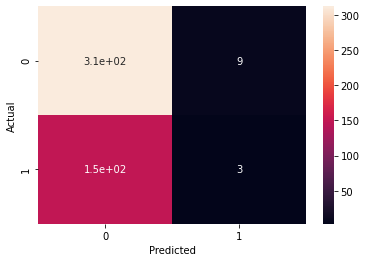

In [29]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
sn

In [26]:
# Accuracy = 0.66
# using Logistic Regression
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6645569620253164


In [28]:
# Second classification : K Neighbour Classifier
# Accuracy = 0.87

In [27]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
# print(predictions)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       321
           1       0.76      0.85      0.80       153

    accuracy                           0.87       474
   macro avg       0.84      0.86      0.85       474
weighted avg       0.87      0.87      0.87       474

